In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Load the dataset
df = pd.read_csv("travel-insurance.csv")
df.head(10)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
5,5,25,Private Sector/Self Employed,No,1150000,4,0,No,No,0
6,6,31,Government Sector,Yes,1300000,4,0,No,No,0
7,7,31,Private Sector/Self Employed,Yes,1350000,3,0,Yes,Yes,1
8,8,28,Private Sector/Self Employed,Yes,1450000,6,1,Yes,Yes,1
9,9,33,Government Sector,Yes,800000,3,0,Yes,No,0


Here follows the list of columns in the dataset:

* Age - Age of the customer
* Employment Type - The sector in which customer is employed
* GraduateOrNot - Whether the customer is college graduate or not
* AnnualIncome - The yearly income of the customer in indian rupees
* FamilyMembers - Number of members in customer's family
* ChronicDisease - Whether the customer suffers from any major disease or conditions like diabetes/high BP or asthama, etc.
* FrequentFlyer - Derived data based on customer's history of booking air tickets on atleast 4 different instances in the last 2 Years (2017-2019).
* EverTravelledAbroad - Has the customer ever travelled to a foreign country.
* TravelInsurance: (label) Did the customer buy travel insurance package during introductory offering held in the year 2019.

# Exploratory Data Analysis

In [ ]:
# Coppy the dataset
data = df.copy()

In [ ]:
# View summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [ ]:
print("Statistics of numerical values \n")
print(data.describe())
print()
print("Statistics of categorial values \n")
print(data.describe(include=[object]))

Statistics of numerical values 

        Unnamed: 0          Age  AnnualIncome  FamilyMembers  ChronicDiseases  \
count  1987.000000  1987.000000  1.987000e+03    1987.000000      1987.000000   
mean    993.000000    29.650226  9.327630e+05       4.752894         0.277806   
std     573.741812     2.913308  3.768557e+05       1.609650         0.448030   
min       0.000000    25.000000  3.000000e+05       2.000000         0.000000   
25%     496.500000    28.000000  6.000000e+05       4.000000         0.000000   
50%     993.000000    29.000000  9.000000e+05       5.000000         0.000000   
75%    1489.500000    32.000000  1.250000e+06       6.000000         1.000000   
max    1986.000000    35.000000  1.800000e+06       9.000000         1.000000   

       TravelInsurance  
count      1987.000000  
mean          0.357323  
std           0.479332  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max           1.000000  

Statistics 

In [ ]:
print("Continuous Columns")
numerical_cols = data.describe().columns
print(numerical_cols)
print("Categorical Columns")
categorical_cols = data.describe(include=[object]).columns
print(categorical_cols)

Continuous Columns
Index(['Unnamed: 0', 'Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases',
       'TravelInsurance'],
      dtype='object')
Categorical Columns
Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')


In [ ]:
# Drop "Unnamed" column as it does not contain useful information for building the model
data = data.drop(columns=["Unnamed: 0"], axis=1)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'AnnualIncome'}>],
       [<Axes: title={'center': 'FamilyMembers'}>,
        <Axes: title={'center': 'ChronicDiseases'}>],
       [<Axes: title={'center': 'TravelInsurance'}>, <Axes: >]],
      dtype=object)

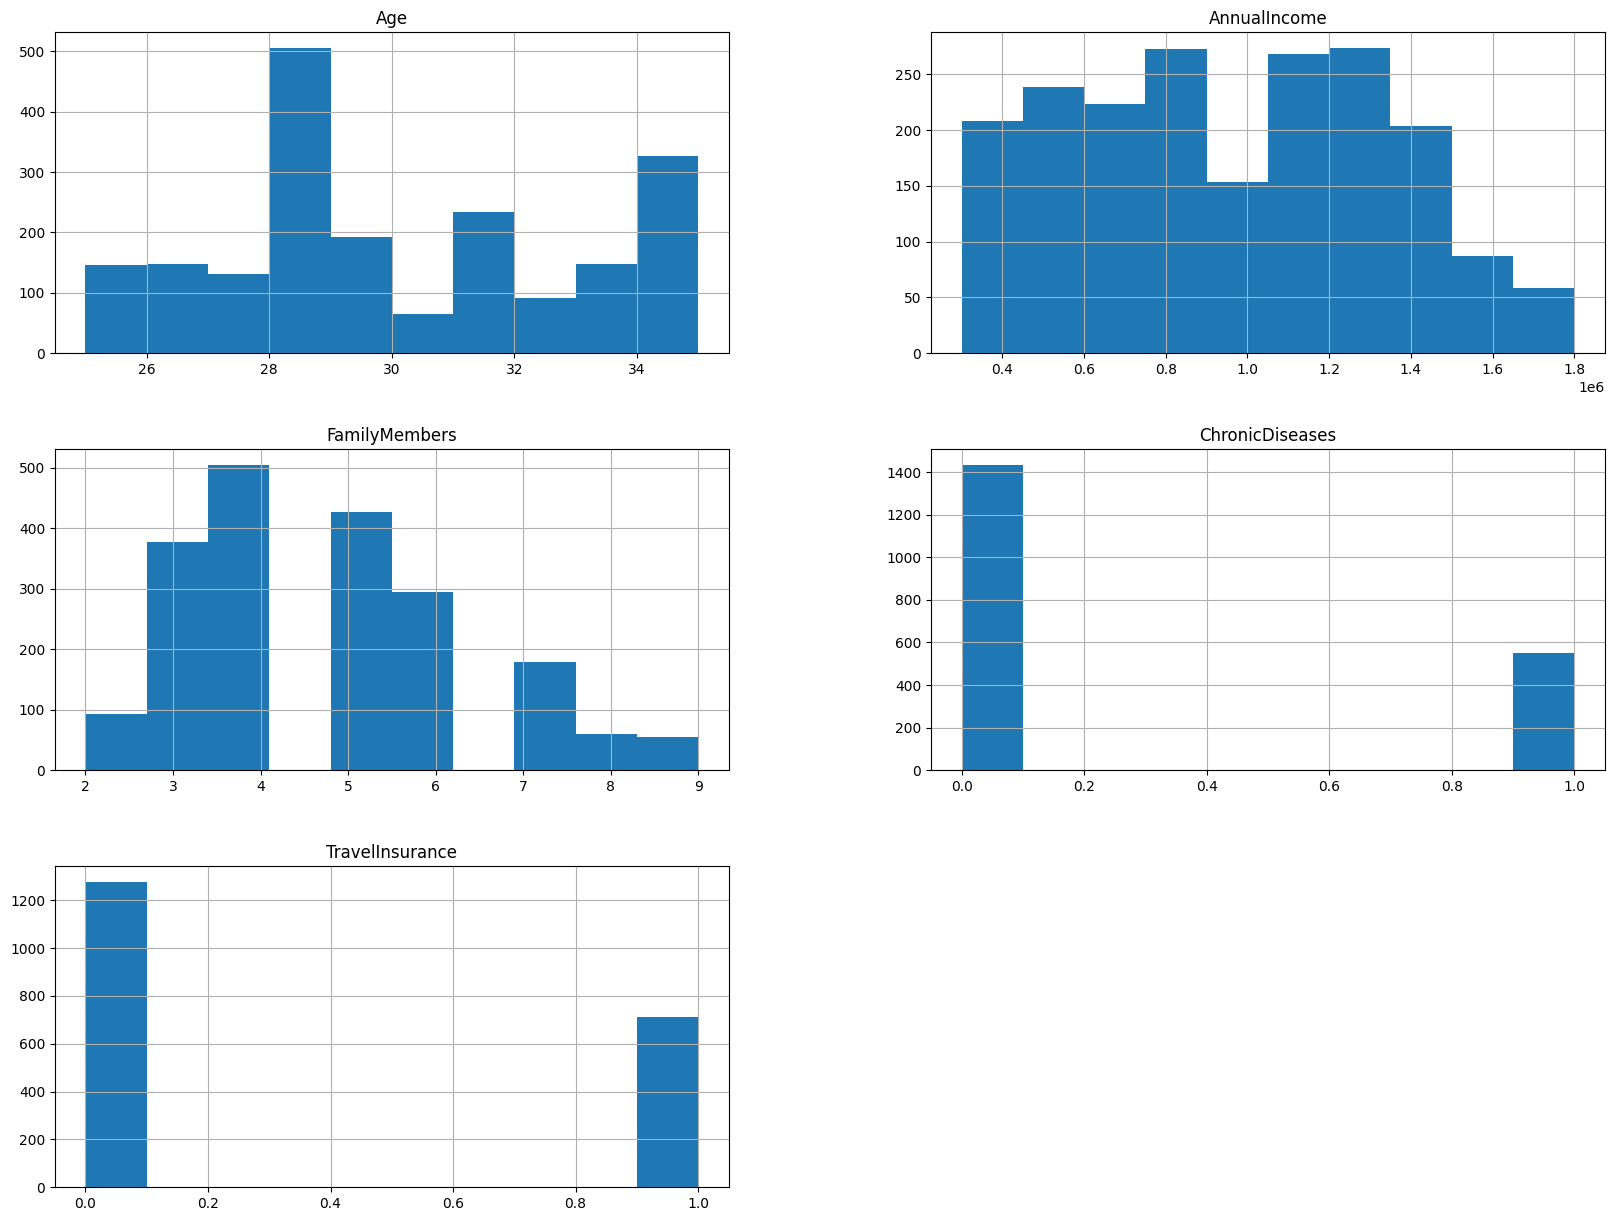

In [ ]:
# Explore the distribution of continuous variable
data.hist(figsize=(20, 15))

<ipython-input-69-363b0f3af3a9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', fmt='.5f')


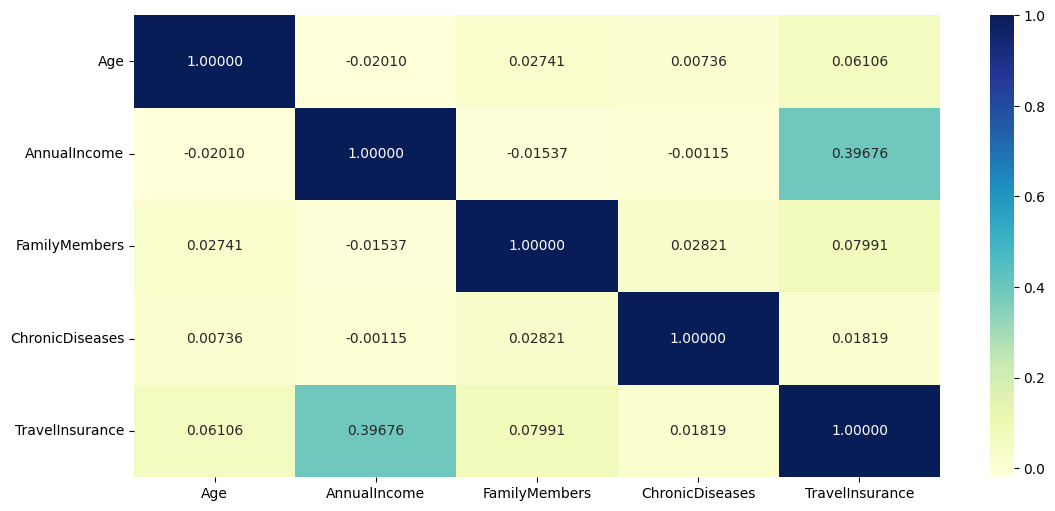

In [ ]:
# Plot the heatmap to see the correlation between Travel Insurrance and continuous variable
plt.figure(figsize=(13, 6))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', fmt='.5f')
plt.show()

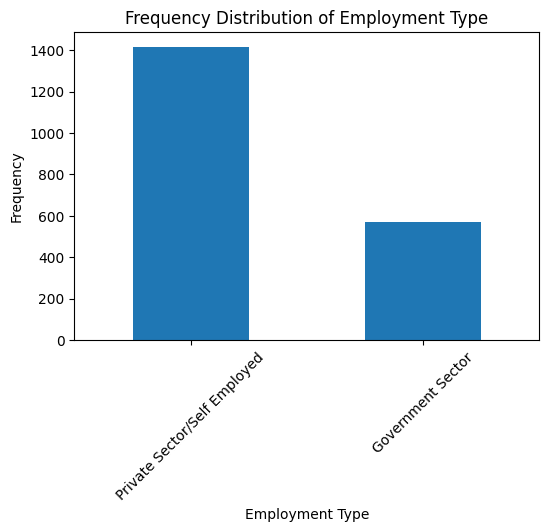

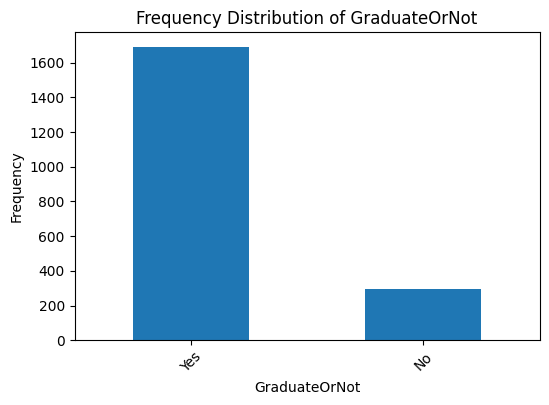

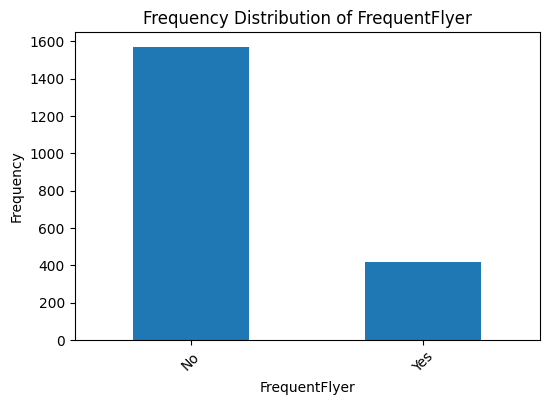

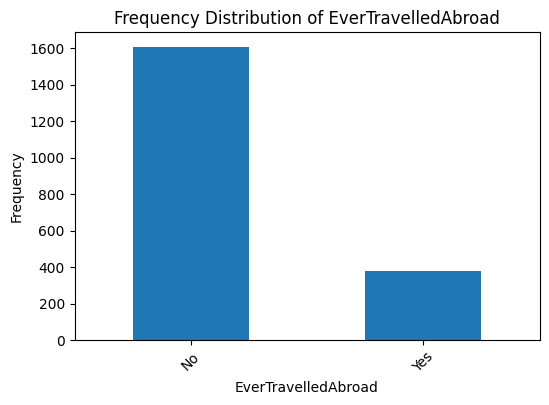

In [ ]:
categorical_cols = ['Employment Type','GraduateOrNot', 'FrequentFlyer','EverTravelledAbroad']
# Create bar charts for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# Convert categorize variable into dummies values
categorize_variable=['Employment Type', 'GraduateOrNot', 'FrequentFlyer','EverTravelledAbroad']
for ele in (categorize_variable):
  data = pd.get_dummies(data=data, columns=[ele])

In [ ]:
data.head(5)

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
0,31,400000,6,1,0,1,0,0,1,1,0,1,0
1,31,1250000,7,0,0,0,1,0,1,1,0,1,0
2,34,500000,4,1,1,0,1,0,1,1,0,1,0
3,28,700000,3,1,0,0,1,0,1,1,0,1,0
4,28,700000,8,1,0,0,1,0,1,0,1,1,0


In [ ]:
data.rename(columns={'Employment Type_Private Sector/Self Employed': 'Private Sector/Self Employed'}, inplace=True)
data.rename(columns={'Employment Type_Government Sector': 'Government Sector'}, inplace=True)
data.rename(columns={'GraduateOrNot_No': 'Not Graduate'}, inplace=True)
data.rename(columns={'GraduateOrNot_Yes': 'Graduated'}, inplace=True)

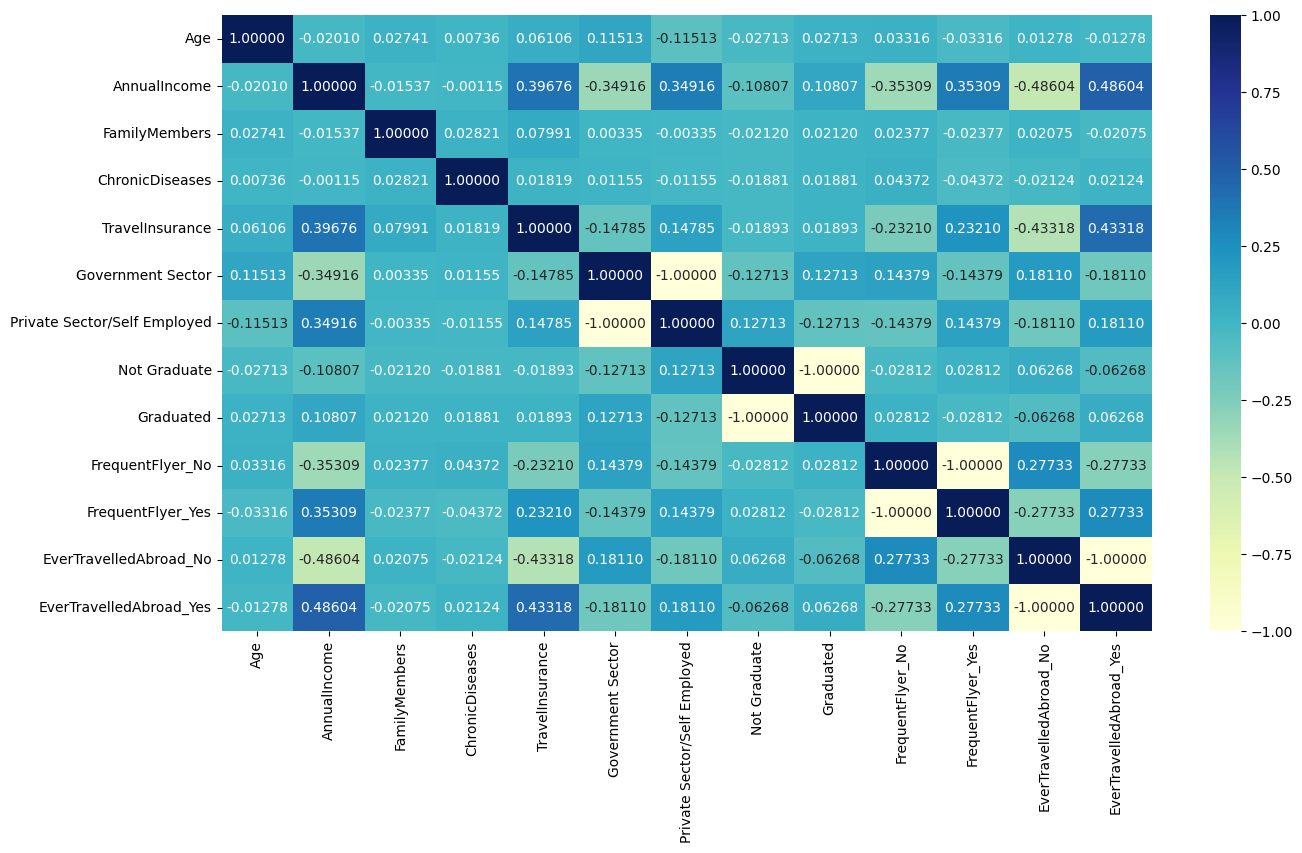

In [ ]:
# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', fmt='.5f')
plt.show()

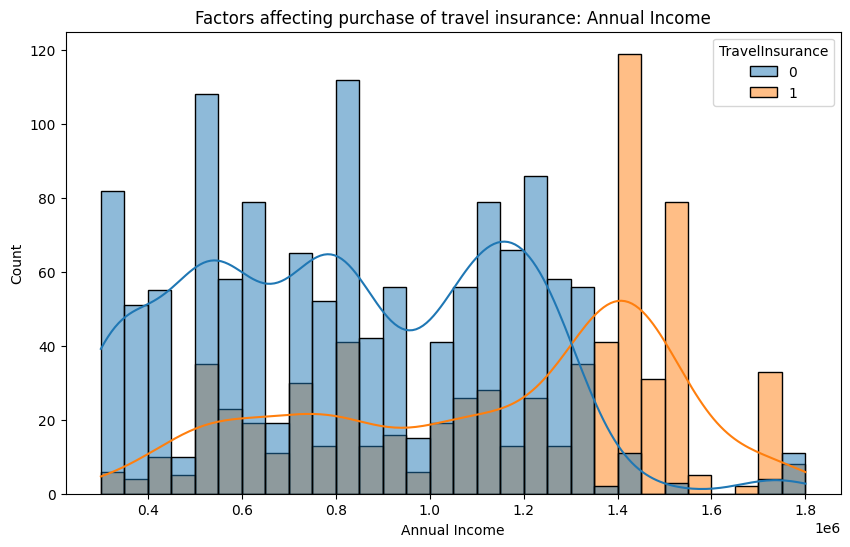

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="AnnualIncome", hue="TravelInsurance", bins=30, kde=True)
plt.title("Factors affecting purchase of travel insurance: Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Count")
plt.show()

# Model Training

**Split the dataset into training, validation and test set.**

In [ ]:
# Get the list of data features from column names
feature_names = data.columns.tolist()
# Remove the label column "TravelInsurance" from the data features
feature_names.remove("TravelInsurance")
# Assign data feature values to variable X
X = data[feature_names].values
# Assign data label values to variable y
y = data.TravelInsurance.values

In [ ]:
feature_names

['Age',
 'AnnualIncome',
 'FamilyMembers',
 'ChronicDiseases',
 'Government Sector',
 'Private Sector/Self Employed',
 'Not Graduate',
 'Graduated',
 'FrequentFlyer_No',
 'FrequentFlyer_Yes',
 'EverTravelledAbroad_No',
 'EverTravelledAbroad_Yes']

In [ ]:
# Show data feature shape
X.shape

(1987, 12)

In [ ]:
# Show label shape
y.shape

(1987,)

In [ ]:
# Split the data into train/test set using sklearn library
from sklearn.model_selection import train_test_split
# Split the data into 20% for test set, 64% for training, 16% for validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [ ]:
# Standardize the data using Standard scaler
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
X_normal_train = normalizer.fit_transform(X_train)
X_normal_val = normalizer.transform(X_val)
X_normal_test = normalizer.transform(X_test)

**Manual use of validation set**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# First try with var_smoothing=1e-9
naive_model = GaussianNB(var_smoothing=1e-9)
naive_model.fit(X_normal_train, y_train)
naive_model.score(X_normal_val, y_val)

0.7075471698113207

In [ ]:
# Try with var_smoothing=1e-7
naive_model = GaussianNB(var_smoothing=1e-7)
naive_model.fit(X_normal_train, y_train)
naive_model.score(X_normal_val, y_val)

0.7075471698113207

In [ ]:
# Try with var_smoothing=0.01
naive_model = GaussianNB(var_smoothing=0.01)
naive_model.fit(X_normal_train, y_train)
naive_model.score(X_normal_val, y_val)

0.7075471698113207

In [ ]:
# Try with var_smoothing=0.5
naive_model = GaussianNB(var_smoothing=0.5)
naive_model.fit(X_normal_train, y_train)
naive_model.score(X_normal_val, y_val)

0.7295597484276729

In [ ]:
# Try with var_smoothing=0.7
naive_model = GaussianNB(var_smoothing=0.7)
naive_model.fit(X_normal_train, y_train)
naive_model.score(X_normal_val, y_val)

0.7327044025157232

In [ ]:
# Try with var_smoothing=1
naive_model = GaussianNB(var_smoothing=1)
naive_model.fit(X_normal_train, y_train)
naive_model.score(X_normal_val, y_val)

0.7547169811320755

In [ ]:
# Try with var_smoothing=2
naive_model = GaussianNB(var_smoothing=2)
naive_model.fit(X_normal_train, y_train)
naive_model.score(X_normal_val, y_val)

0.7327044025157232

**Use the validation with GridSearchCV**

In [ ]:
# Load the libraries
from sklearn.model_selection import GridSearchCV
from numpy import vstack, concatenate
# Define the values of hyperparameter var_smoothing we want to try
grid_search = {"var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1,0.5, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4,2.5, 3]}
# Initialize the GaussianNB model
naive_model = GaussianNB()
# Set up GridSearchCV to find the best value of hyperparameter var_smoothing, with 5-fold cross-validation (cv=5).
naive_cv = GridSearchCV(naive_model, grid_search, cv=5)
# Combine training and validation sets
X_normal_train_val = vstack((X_normal_train, X_normal_val))
y_train_val = concatenate((y_train, y_val))
# Train the model using GridSearchCV
naive_cv.fit(X_normal_train_val, y_train_val)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1, 0.5, 0.7,
                                           0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4,
                                           1.5, 1.6, 1.8, 1.9, 2, 2.1, 2.2, 2.3,
                                           2.4, 2.5, 3]})

In [ ]:
# Show the best value of var_smoothing
naive_cv.best_params_

{'var_smoothing': 1.4}

In [ ]:
# Show the model performance with best value of var_smoothing
naive_cv.best_score_

0.7658929032002064

In [ ]:
best_var_smoothing = naive_cv.best_params_["var_smoothing"]

# Train GaussianNB

In [ ]:
# Initialize GaussianNB model with the best var_smoothing
best_naive_model = GaussianNB(var_smoothing=best_var_smoothing)
# Train the model with the best hyperparameter
best_naive_model.fit(X_normal_train, y_train)

GaussianNB(var_smoothing=1.4)

In [ ]:
# Test accuracy of the best hyperparameter
best_naive_model.score(X_normal_test, y_test)

0.7788944723618091

# GaussianNB Evaluation

In [ ]:
# Impport libraries to calculate evaluation metrics: precision, recall, f1 score.
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [ ]:
# Make prediction on the test data
predicted_label = best_naive_model.predict(X_normal_test)
# Calculate evaluation metrics by comparing the prediction with the data label y_test
print("Precision: ", precision_score(predicted_label,y_test))
print("Recall: ", recall_score(predicted_label,y_test))
print("F1: ", f1_score(predicted_label, y_test))
print(classification_report(predicted_label,y_test))

Precision:  0.4827586206896552
Recall:  0.8433734939759037
F1:  0.6140350877192983
              precision    recall  f1-score   support

           0       0.95      0.76      0.85       315
           1       0.48      0.84      0.61        83

    accuracy                           0.78       398
   macro avg       0.72      0.80      0.73       398
weighted avg       0.85      0.78      0.80       398



# Train MixedNB

In [ ]:
pip install mixed-naive-bayes

In [ ]:
pip install git+https://github.com/remykarem/mixed-naive-bayes#egg=mixed-naive-bayes

  Cloning https://github.com/remykarem/mixed-naive-bayes to /tmp/pip-install-lji3_xp2/mixed-naive-bayes_f3f4507cb1cf4115b04c4e916beb500c
  Running command git clone --filter=blob:none --quiet https://github.com/remykarem/mixed-naive-bayes /tmp/pip-install-lji3_xp2/mixed-naive-bayes_f3f4507cb1cf4115b04c4e916beb500c
  Resolved https://github.com/remykarem/mixed-naive-bayes to commit 6d90de8adf75dbef032ad51029ad3782190ec577
  Preparing metadata (setup.py) ... done


In [ ]:
# Import mixed Naive Bayes library
from mixed_naive_bayes import MixedNB
from sklearn.metrics import make_scorer, f1_score
# Initialize the MixedNB model
MixedNB_model = MixedNB(categorical_features=[6, 7, 8, 9, 10, 11])

In [ ]:
from mixed_naive_bayes import MixedNB
from sklearn.metrics import make_scorer, f1_score
from numpy import vstack, concatenate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
# Define the values of hyperparameter var_smoothing to try
var_smoothing_values = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.5, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 3]
# Combine training and validation sets
X_normal_train_val = vstack((X_normal_train, X_normal_val))
y_train_val = concatenate((y_train, y_val))

# Initialize variables to store the best hyperparameters
best_score = 0
best_var_smoothing = None

# Iterate through hyperparameter values
for var_smoothing in var_smoothing_values:
    # Create a new instance of MixedNB with the current hyperparameter
    MixedNB_model = MixedNB(var_smoothing=var_smoothing)
    # Make predictions using cross_val_predict
    y_pred = cross_val_predict(MixedNB_model, X_normal_train_val, y_train_val, cv=5)
    # Evaluate the model using F1-score
    current_score = f1_score(y_train_val, y_pred)
    # Check if the current hyperparameter value gives a better score
    if current_score > best_score:
        best_score = current_score
        best_var_smoothing = var_smoothing
# Print the best hyperparameter value and corresponding F1-score
print("Best var_smoothing:", best_var_smoothing)

Best var_smoothing: 1.0


In [ ]:
# Initialize MixedNB model with the best var_smoothing
best_MixedNB_model = MixedNB(var_smoothing=1.0)
# Train the model with the best hyperparameter
best_MixedNB_model.fit(X_normal_train, y_train)

MixedNB(alpha=0.5, var_smoothing=1.0)

In [ ]:
# Test accuracy of the best hyperparameter
best_MixedNB_model.score(X_normal_test, y_test)

0.7889447236180904

# MixedNB Evaluation

In [ ]:
# Make prediction on the test data
predicted_label = best_MixedNB_model.predict(X_normal_test)

# Calculate evaluation metrics by comparing the prediction with the data label y_test
# Print individual metrics
precision = precision_score(predicted_label, y_test)
recall = recall_score(predicted_label, y_test)
f1 = f1_score(predicted_label, y_test)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print(classification_report(predicted_label, y_test))

Precision: 0.5103448275862069
Recall: 0.8505747126436781
F1-Score: 0.6379310344827587
              precision    recall  f1-score   support

           0       0.95      0.77      0.85       311
           1       0.51      0.85      0.64        87

    accuracy                           0.79       398
   macro avg       0.73      0.81      0.74       398
weighted avg       0.85      0.79      0.80       398



**Comparison performance between GaussianNB and MixedNB**
- Precision: MixedNB has a slightly higher precision (0.51) compared to GaussianNB (0.48), indicating that MixedNB has a slightly better ability to make accurate positive predictions.
- Recall: MixedNB has a higher recall (0.85) compared to GaussianNB (0.84), indicating that MixedNB captures a higher percentage of actual positive instances.
- F1-Score: MixedNB has a higher F1-Score (0.64) compared to GaussianNB (0.61), reflecting a better balance between precision and recall.

Overall, based on the provided metrics, MixedNB appears to have slightly better performance on the test set compared to GaussianNB.
